#### Analysis of bounding box color distribution

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from skimage.draw import polygon
import os
import cupy as cp
from joblib import Parallel, delayed



In [11]:
state="test_bihar"
image_dir = f"../data/region_performace/{state}_same_class_count/images"
label_dir = f"../data/region_performace/{state}_same_class_count/labels"

def calculate_rgb_distribution(image,bbox):
    class_id,x1,y1,x2,y2,x3,y3,x4,y4 = bbox
    img_height,img_width = image.shape[1],image.shape[0]
    coords=np.array([
        [x1*img_width,y1*img_height],
        [x2*img_width,y2*img_height],
        [x3*img_width,y3*img_height],
        [x4*img_width,y4*img_height]],dtype=np.int32

    )

    mask = np.zeros((img_height,img_width),dtype=bool)
    rr, cc = polygon(coords[:,1],coords[:,0], shape=(img_height, img_width))
    mask[rr,cc]=1
    image_np = np.array(image)

    region_red = image_np[:,:,0][mask]
    region_green = image_np[:,:,1][mask]
    region_blue = image_np[:,:,2][mask]
    # print(region_red.dtype)
    # print(region_red)
    # print(region_green.shape)
    # print(region_blue.shape)
    avg_red=region_red.mean()
    avg_green=region_green.mean()
    avg_blue=region_blue.mean()

    std_red=region_red.std()
    std_green=region_green.std()
    std_blue=region_blue.std()
    

    return avg_red,avg_green,avg_blue,std_red,std_green,std_blue


In [12]:
def process_image(image_path, label_path):
    with open(label_path, 'r') as f:
        bboxes = [list(map(float, line.strip().split())) for line in f.readlines()]
    
    with rasterio.open(image_path) as src:
        red = src.read(1)
        green = src.read(2)
        blue = src.read(3)
        image = np.dstack((red, green, blue))  
    
    results = []
    for bbox in bboxes:
        result = calculate_rgb_distribution(image, bbox)
        results.append(result)
    
    return results


In [13]:
avg_reds = []
avg_greens = []
avg_blues = []
std_reds = []
std_greens = []
std_blues = []
results = []

image_paths = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith('.tif')]
print(image_paths)
label_paths = [os.path.join(label_dir, f.replace('.tif', '.txt')) for f in os.listdir(image_dir) if f.endswith('.tif')]
print(label_paths)


results = Parallel(n_jobs=42)(delayed(process_image)(image_path, label_path) for image_path, label_path in zip(image_paths, label_paths))

for result in results:
    for avg_red, avg_green, avg_blue, std_red, std_green, std_blue in result:
            avg_reds.append(avg_red)
            avg_greens.append(avg_green)
            avg_blues.append(avg_blue)
            std_reds.append(std_red)
            std_greens.append(std_green)
            std_blues.append(std_blue)





['../data/region_performace/test_bihar_same_class_count/images/9584899_3075212.tif', '../data/region_performace/test_bihar_same_class_count/images/9414292_3121991.tif', '../data/region_performace/test_bihar_same_class_count/images/9562886_2855073.tif', '../data/region_performace/test_bihar_same_class_count/images/9565637_3058701.tif', '../data/region_performace/test_bihar_same_class_count/images/9634431_3006418.tif', '../data/region_performace/test_bihar_same_class_count/images/9733493_3044943.tif', '../data/region_performace/test_bihar_same_class_count/images/9568389_3053198.tif', '../data/region_performace/test_bihar_same_class_count/images/9414292_3105481.tif', '../data/region_performace/test_bihar_same_class_count/images/9370264_3058701.tif', '../data/region_performace/test_bihar_same_class_count/images/9381271_3017425.tif', '../data/region_performace/test_bihar_same_class_count/images/9590403_2940377.tif', '../data/region_performace/test_bihar_same_class_count/images/9634431_28688

In [14]:
# state="bihar"
mean_red = np.mean(avg_reds)
# mean_red=avg_reds.mean()

mean_green = np.mean(avg_greens)
mean_blue = np.mean(avg_blues)

mean_std_red = np.mean(std_reds)
mean_std_green = np.mean(std_greens)
mean_std_blue = np.mean(std_blues)

# Print the results
print(f"Average Red Channel: {mean_red}")
print(f"Average Green Channel: {mean_green}")
print(f"Average Blue Channel: {mean_blue}")
print(f"Standard Deviation of Red Channel: {mean_std_red}")
print(f"Standard Deviation of Green Channel: {mean_std_green}")
print(f"Standard Deviation of Blue Channel: {mean_std_blue}")

Average Red Channel: 194.07798186825258
Average Green Channel: 146.7686282575914
Average Blue Channel: 108.69869373932227
Standard Deviation of Red Channel: 27.787873354345265
Standard Deviation of Green Channel: 23.136584692503295
Standard Deviation of Blue Channel: 19.064977710632018


In [15]:
print(avg_reds)
#print max and min values
print(f"Max Red: {max(avg_reds)}")
print(f"Min Red: {min(avg_reds)}")

[179.75113122171945, 179.75113122171945, 195.03076923076924, 195.03076923076924, 216.01546391752578, 230.15151515151516, 183.7703180212014, 198.55384615384617, 198.22448979591837, 168.93700787401573, 209.79891304347825, 194.29556650246306, 171.3047619047619, 184.09795918367348, 208.3089430894309, 226.65806451612903, 212.2107843137255, 213.7107843137255, 218.81220657276995, 220.45876288659792, 223.75428571428571, 198.78765432098766, 220.18018018018017, 183.90776699029126, 203.52059925093633, 203.4848484848485, 179.48029556650246, 178.61494252873564, 174.12786885245902, 174.4758620689655, 171.035, 170.921875, 142.739336492891, 217.03787878787878, 215.26388888888889, 234.97309417040358, 198.22093023255815, 177.9655172413793, 189.1517027863777, 199.87179487179486, 159.28571428571428, 204.25233644859813, 203.9268292682927, 189.97909407665506, 223.0899470899471, 113.4780876494024, 231.9064039408867, 205.85294117647058, 112.70434782608696, 223.73511904761904, 124.16022099447514, 165.715277777

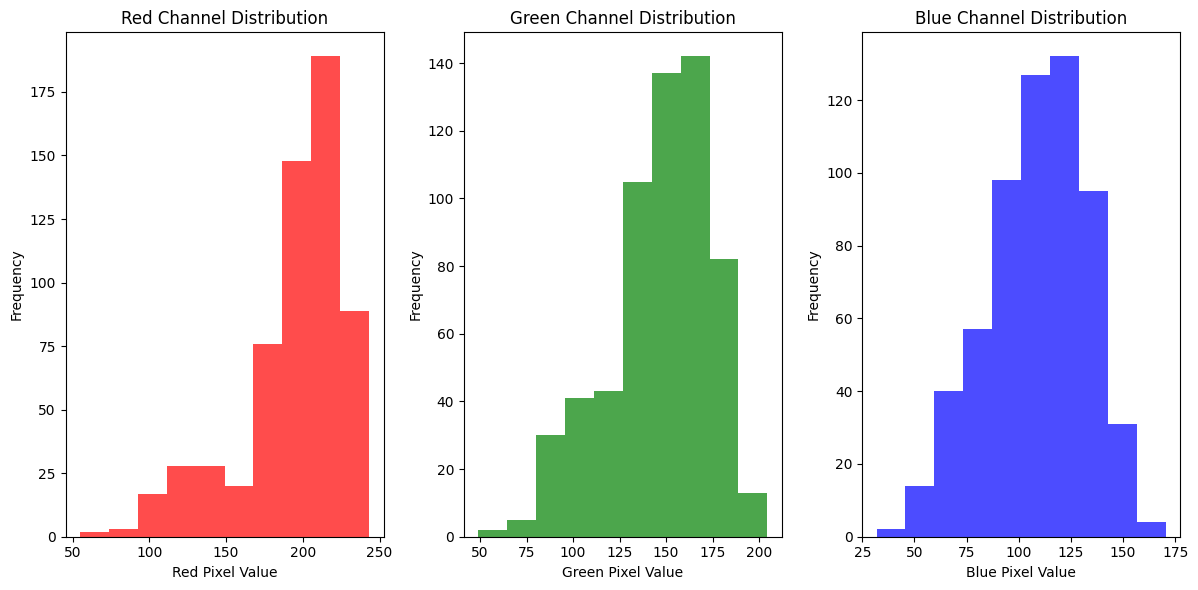

In [16]:


# Create histograms for each color channel
plt.figure(figsize=(12, 6))

# Red channel
plt.subplot(1, 3, 1)
plt.hist(avg_reds, bins=10, color='r', alpha=0.7)
plt.title('Red Channel Distribution')
plt.xlabel('Red Pixel Value')
plt.ylabel('Frequency')

# Green channel
plt.subplot(1, 3, 2)
plt.hist(avg_greens, bins=10, color='g', alpha=0.7)
plt.title('Green Channel Distribution')
plt.xlabel('Green Pixel Value')
plt.ylabel('Frequency')

# Blue channel
plt.subplot(1, 3, 3)
plt.hist(avg_blues, bins=10, color='b', alpha=0.7)
plt.title('Blue Channel Distribution')
plt.xlabel('Blue Pixel Value')
plt.ylabel('Frequency')
plt.savefig(f"../figures/bihar_same_class_count_histogram.png")
plt.tight_layout()
plt.show()


In [17]:
## save the results into a csv file
import csv
import pandas as pd
# Prepare the data to be saved into CSV
# state = "bihar"  # Example state

data = {
    "State": [state],
    "Average Red": [mean_red],
    "Average Green": [mean_green],
    "Average Blue": [mean_blue],
    "Std Red": [mean_std_red],
    "Std Green": [mean_std_green],
    "Std Blue": [mean_std_blue]
}

# Convert data into a DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
csv_file_path = "../result_csv/state_rgb_values.csv"
# df.to_csv(csv_file_path, index=False, mode='a', header=not pd.io.common.file_exists(csv_file_path))

# print(f"Results saved to {csv_file_path}")


In [18]:
color_data=pd.read_csv(csv_file_path)
if not os.path.exists("../result_csv/state_rgb_values.csv"):
    color_data.to_csv("../result_csv/state_rgb_values.csv",index=False)
else:
    df.to_csv("../result_csv/state_rgb_values.csv",mode='a',header=False,index=False)
    